# Setup

In [1]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import compute_in_degrees
import numpy as np
import seaborn as sns
from network_computation import compute_functional_network
from utils.utils import common_elements

Data

waist

0. OL_wx[active_slice]
1. OL_wy[active_slice]
2. OL_wz[active_slice]

hoop

3. OR_wx[active_slice]
4. OR_wy[active_slice]
5. OR_wz[active_slice]

tibia

6. IT_wx[active_slice]
7. IT_wy[active_slice]
8. IT_wz[active_slice]

cuneiform

9. IL_wx[active_slice]
10. IL_wy[active_slice]
11. IL_wz[active_slice]

femur

12. IB_wx[active_slice]
13. IB_wy[active_slice]
14. IB_wz[active_slice]

# Picking the recurrence rate

In [2]:
# truncate data

data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[0:500,:]

In [3]:
np.shape(data)

(500, 15)

In [4]:
# Define recurrence rate sets
rr_values = [
    # (0.01, 0.01, 0.005),
    # (0.03, 0.03, 0.01),
    # (0.03, 0.03, 0.02),
    # (0.04, 0.04, 0.02),
    (0.05, 0.05, 0.02),
    (0.06, 0.06, 0.02),
    (0.06, 0.06, 0.03),
    # (0.08, 0.08, 0.02)
    # (0.08, 0.08, 0.04),
    # (0.1, 0.1, 0.02)
    # (0.1, 0.1, 0.04),
    # (0.1, 0.1, 0.05),
]

# Compute networks
results = []
for rr in rr_values:
    G, G_, common_G, T_diff, C_diff, C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(
        data, rr, C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1]
    )
    results.append({'rr': rr, 'T_diff': T_diff, 'C_diff': C_diff})


Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

In [5]:
# Initialize matrices for pairwise differences
n = len(rr_values)
delta_T = np.zeros((n, n))
delta_C = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        delta_T[i, j] = np.max(np.abs(results[j]['T_diff'] - results[i]['T_diff']))
        delta_C[i, j] = np.max(np.abs(results[j]['C_diff'] - results[i]['C_diff']))



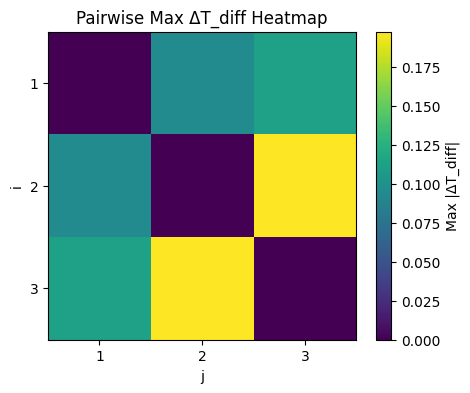

In [6]:
# Plot delta_T with custom axis labels
plt.figure(figsize=(5, 4))
im = plt.imshow(delta_T, cmap='viridis', interpolation='nearest')
plt.colorbar(im, label='Max |ΔT_diff|')

# Set tick positions and labels to 1,2,3,4
tick_labels = np.arange(1, n+1)
plt.xticks(ticks=range(n), labels=tick_labels)
plt.yticks(ticks=range(n), labels=tick_labels)

plt.xlabel("j")
plt.ylabel("i")
plt.title("Pairwise Max ΔT_diff Heatmap")
plt.show()

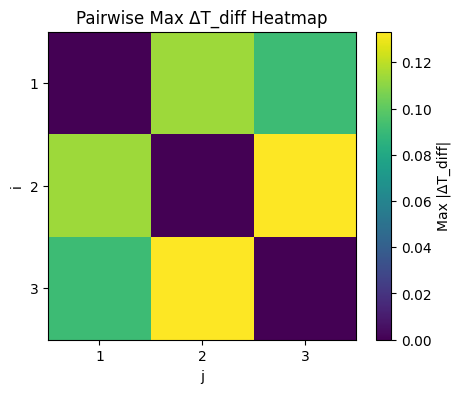

In [7]:
# Plot delta_T with custom axis labels
plt.figure(figsize=(5, 4))
im = plt.imshow(delta_C, cmap='viridis', interpolation='nearest')
plt.colorbar(im, label='Max |ΔT_diff|')

# Set tick positions and labels to 1,2,3,4
tick_labels = np.arange(1, n+1)
plt.xticks(ticks=range(n), labels=tick_labels)
plt.yticks(ticks=range(n), labels=tick_labels)

plt.xlabel("j")
plt.ylabel("i")
plt.title("Pairwise Max ΔT_diff Heatmap")
plt.show()

# Network Analysis
On complete data

Data

hoop

0. OR_wx[active_slice]
1. OR_wy[active_slice]
2. OR_wz[active_slice]

tibia

3. IT_wx[active_slice]
4. IT_wy[active_slice]
5. IT_wz[active_slice]

cuneiform

6. IL_wx[active_slice]
7. IL_wy[active_slice]
8. IL_wz[active_slice]

femur

9. IB_wx[active_slice]
10. IB_wy[active_slice]
11. IB_wz[active_slice]

In [20]:
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[:,3:]

# np.shape(data)[0] = 1894
# np.shape(data)[1] = 15

# computing network
G, G_, common_G, T_diff, C_diff, C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(data,(0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] )

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

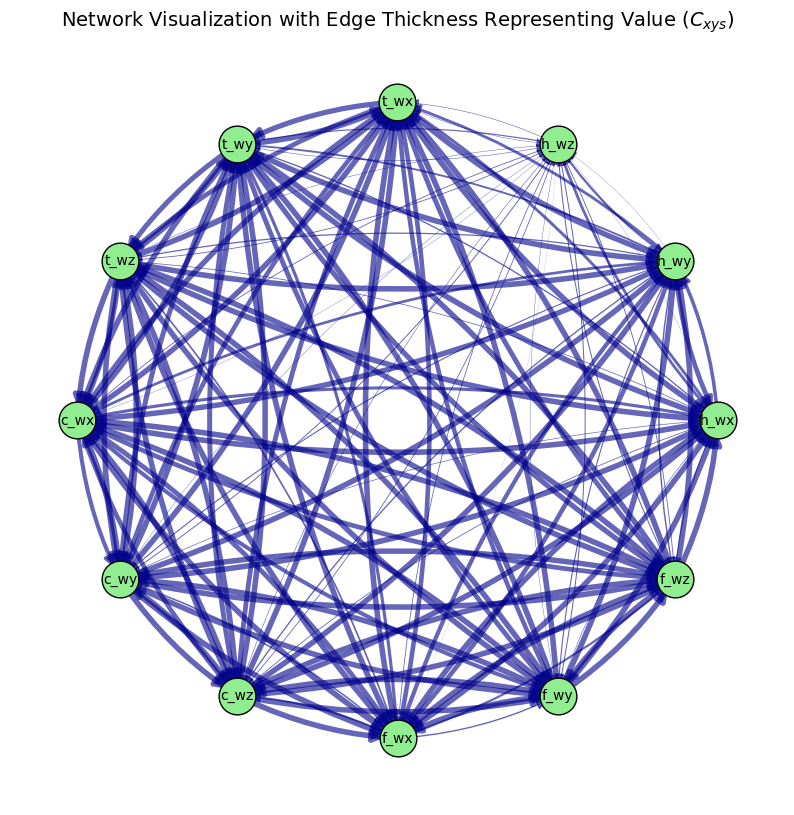

In [23]:

# --- 1. Prepare Data ---
# Optional: Set diagonal to 0 if self-loops are not desired
# (Assuming C_xys is already a numpy array)
np.fill_diagonal(C_xys, 0)

# --- 2. Create Directed Graph and Weights ---
G = nx.DiGraph(C_xys)

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "h_wx", 1: "h_wy", 2: "h_wz", 
    3: "t_wx", 4: "t_wy", 5: "t_wz", 
    6: "c_wx", 7: "c_wy", 8: "c_wz", 
    9: "f_wx", 10: "f_wy", 11: "f_wz"
}

# --- Relabel the Graphs ---
# The new graph LG contains the new node names
LG = nx.relabel_nodes(G, mapping)
# --- End Relabeling ---

# Extract edge weights and edgelist from the RENAMED graph LG
width_scale = 4.0 # Tweak this for desired thickness
edge_widths = [d['weight'] * width_scale for (u, v, d) in LG.edges(data=True) if d['weight'] > 0]

# Create an edgelist containing only edges with positive weight for drawing
edgelist_to_draw = [(u, v) for (u, v, d) in LG.edges(data=True) if d['weight'] > 0]


# --- 3. Get Circular Layout ---
pos = nx.circular_layout(LG)


# --- 4. Draw the Network ---
plt.figure(figsize=(10, 10))

# Draw nodes (using LG)
nx.draw_networkx_nodes(
    LG, 
    pos, 
    node_size=700, 
    node_color='lightgreen', 
    edgecolors='black'
)

# Draw labels (using LG)
nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black')

# Draw edges with varying thickness (using LG)
nx.draw_networkx_edges(
    LG, 
    pos, 
    edgelist=edgelist_to_draw, 
    width=edge_widths, 
    edge_color='darkblue', 
    alpha=0.6,
    arrowsize=15, 
    connectionstyle='arc3,rad=0.1'
)

plt.title("Network Visualization with Edge Thickness Representing Value ($C_{xys}$)", fontsize=14)
plt.axis('off') 
plt.show()

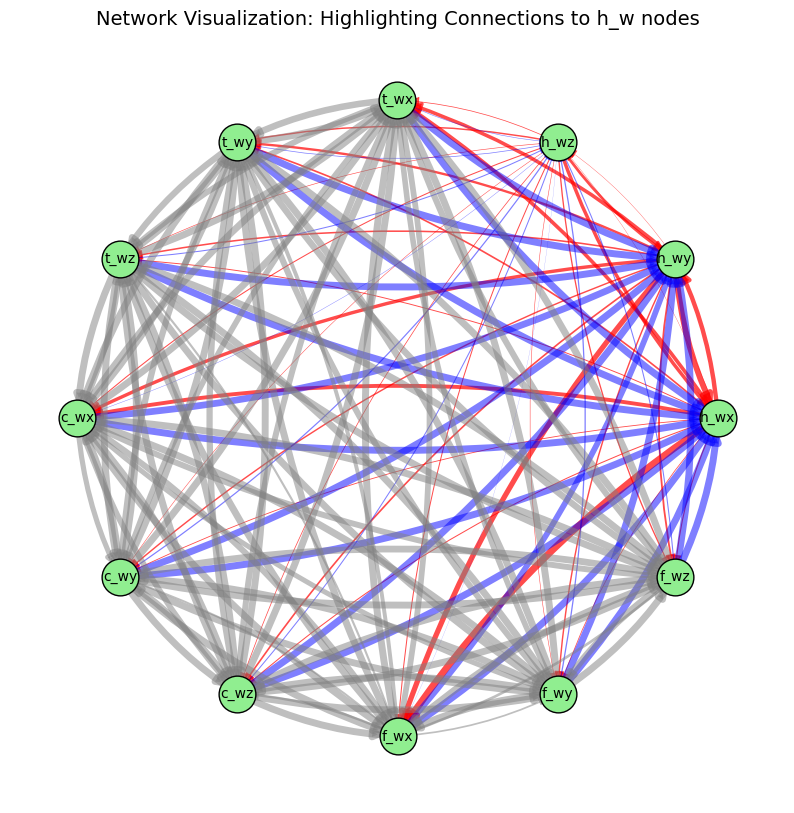

In [27]:
G = nx.DiGraph(C_xys)

mapping = {
    0: "h_wx", 1: "h_wy", 2: "h_wz", 
    3: "t_wx", 4: "t_wy", 5: "t_wz", 
    6: "c_wx", 7: "c_wy", 8: "c_wz", 
    9: "f_wx", 10: "f_wy", 11: "f_wz"
}

LG = nx.relabel_nodes(G, mapping)
pos = nx.circular_layout(LG)


# --- 2. Separate Edges for Coloring ---

# Define the nodes of interest
target_nodes = ["h_wx", "h_wy", "h_wz"]

# Initialize lists for the two groups of edges
special_edgelist = []
special2_edgelist = []
other_edgelist = []
special_widths = []
special2_widths = []
other_widths = []

width_scale = 5.0 

# Iterate over all edges in the renamed graph LG
for u, v, data in LG.edges(data=True):
    weight = data.get('weight', 0)
    
    # Only consider edges with positive weight for drawing
    if weight > 0:
        width = weight * width_scale
        
        # Check if either the source (u) or target (v) is in the target_nodes list
        if u in target_nodes:
            special_edgelist.append((u, v))
            special_widths.append(width)
        elif v in target_nodes:
            special2_edgelist.append((u, v))
            special2_widths.append(width)
        else:
            other_edgelist.append((u, v))
            other_widths.append(width)


# --- 3. Draw the Network ---
plt.figure(figsize=(10, 10))

# 3a. Draw ALL Nodes and Labels
nx.draw_networkx_nodes(
    LG, 
    pos, 
    node_size=700, 
    node_color='lightgreen', 
    edgecolors='black'
)
nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black')


# 3b. Draw the SPECIAL Edges (Red/Orange color)
# Draw these first so they are not fully covered by other edges
nx.draw_networkx_edges(
    LG, 
    pos, 
    edgelist=special_edgelist,
    width=special_widths, 
    edge_color='red', # Highlight color for special edges
    alpha=0.7,
    arrowsize=15, 
    connectionstyle='arc3,rad=0.1' 
)

nx.draw_networkx_edges(
    LG, 
    pos, 
    edgelist=special2_edgelist,
    width=special2_widths, 
    edge_color='blue', # Highlight color for special edges
    alpha=0.5,
    arrowsize=10, 
    connectionstyle='arc3,rad=0.1' 
)

# 3c. Draw the OTHER Edges (Default color)
nx.draw_networkx_edges(
    LG, 
    pos, 
    edgelist=other_edgelist,
    width=other_widths, 
    edge_color='gray', # Default color for other edges
    alpha=0.5,
    arrowsize=10, # Slightly smaller arrow/width for background edges
    connectionstyle='arc3,rad=0.1'
)

plt.title("Network Visualization: Highlighting Connections to h_w nodes", fontsize=14)
plt.axis('off') 
plt.show()

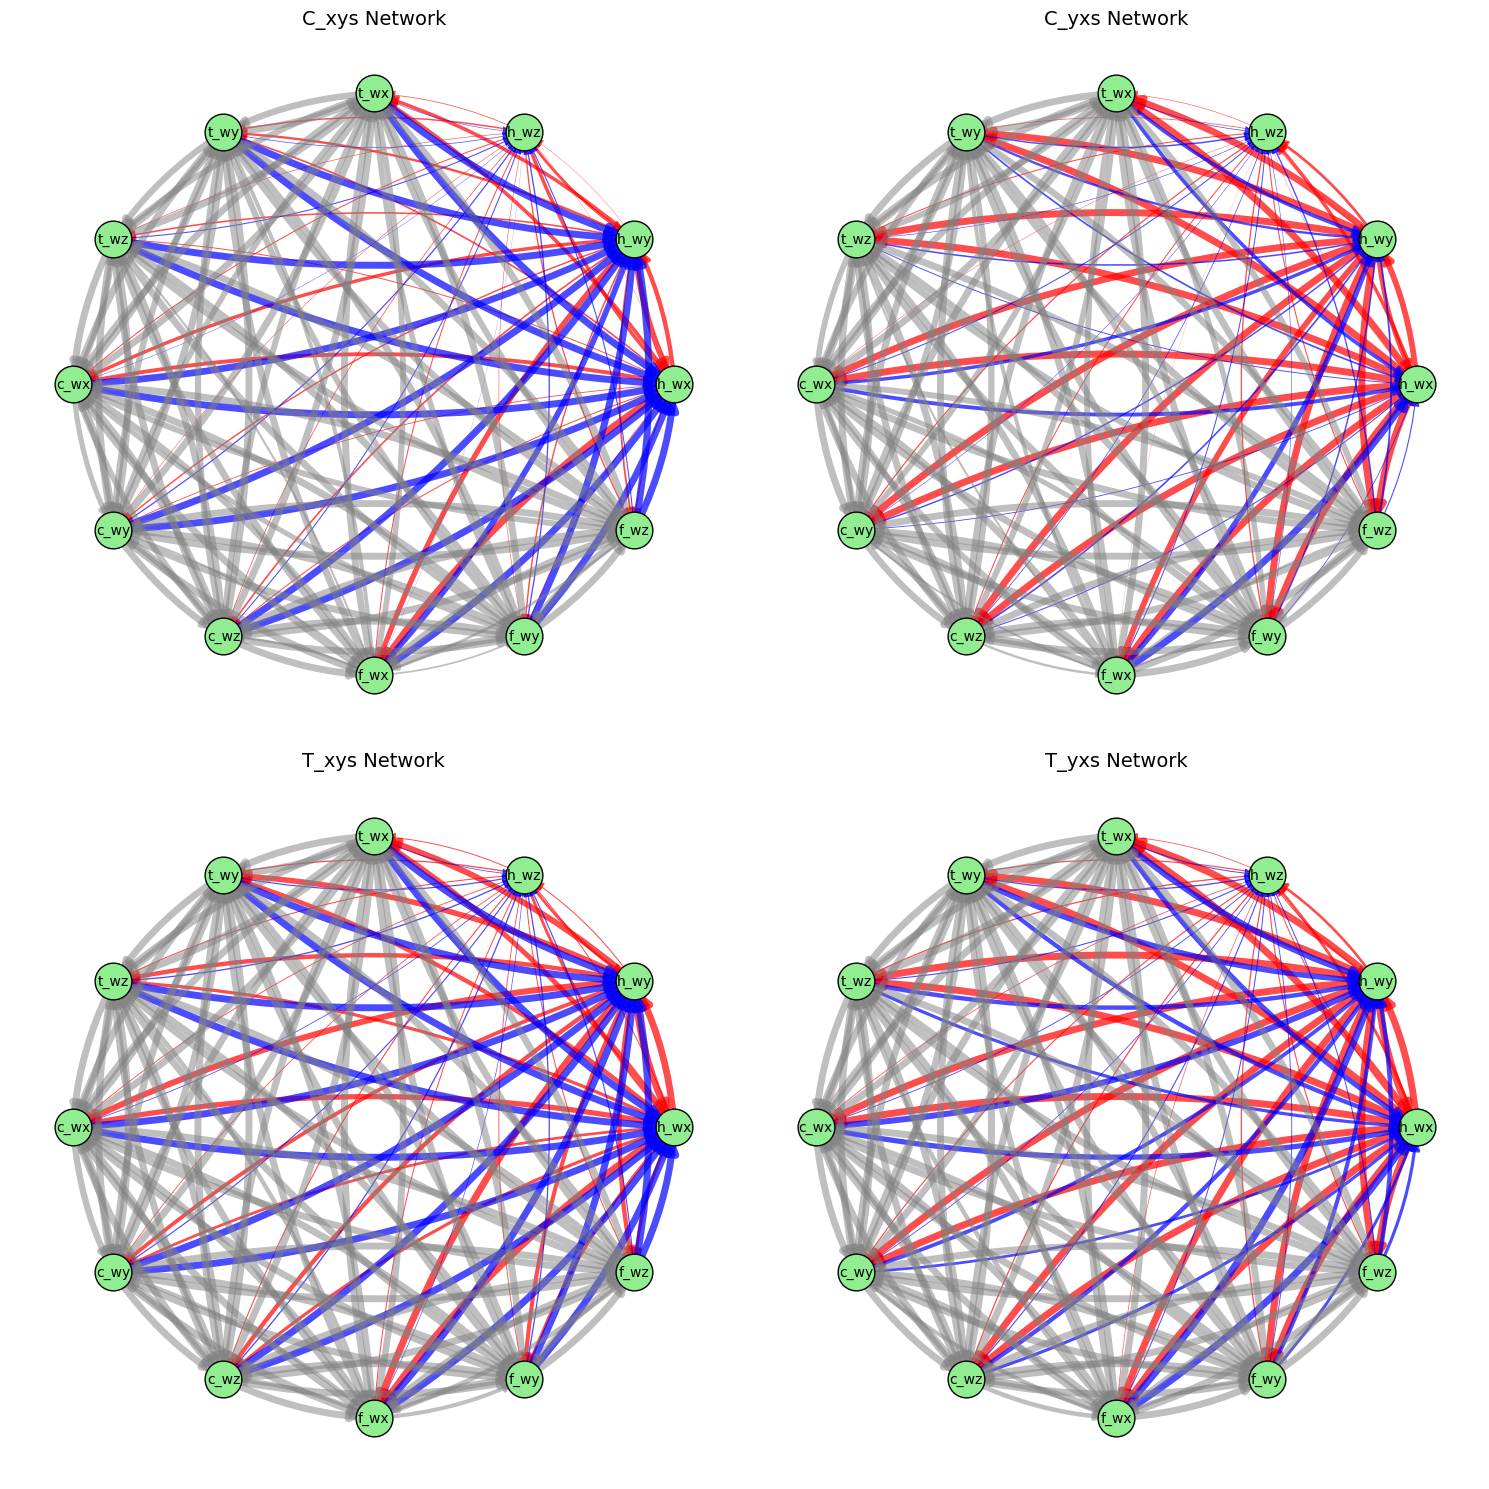

In [28]:

# Set diagonals to 0
for arr in [C_xys, C_yxs, T_xys, T_yxs]:
    np.fill_diagonal(arr, 0)

networks = [C_xys, C_yxs, T_xys, T_yxs]
network_titles = ['C_xys Network', 'C_yxs Network', 'T_xys Network', 'T_yxs Network']

# Define the node mapping once
mapping = {
    0: "h_wx", 1: "h_wy", 2: "h_wz", 
    3: "t_wx", 4: "t_wy", 5: "t_wz", 
    6: "c_wx", 7: "c_wy", 8: "c_wz", 
    9: "f_wx", 10: "f_wy", 11: "f_wz"
}
target_nodes = ["h_wx", "h_wy", "h_wz"]
width_scale = 5.0 

# --- 1. Create Subplots and Loop ---
# Use a larger figure size (e.g., 15x15) to make 4 plots readable
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Flatten the 2x2 axes array for easy indexing: axes_flat[0] to axes_flat[3]
axes_flat = axes.flatten()

# Iterate using enumerate to get the index (i) and the array (network_data)
for i, network_data in enumerate(networks):
    
    # Select the current axis to plot on
    ax = axes_flat[i]
    
    # --- Graph Creation and Relabeling (Corrected) ---
    G = nx.DiGraph(network_data) # network_data is the array
    LG = nx.relabel_nodes(G, mapping)
    pos = nx.circular_layout(LG)


    # --- 2. Separate Edges for Coloring (Corrected) ---
    special_edgelist = []  # Edges FROM target_nodes (e.g., 'red')
    special2_edgelist = [] # Edges TO target_nodes (e.g., 'blue')
    other_edgelist = []    # All other edges (e.g., 'gray')
    special_widths = []
    special2_widths = []
    other_widths = []

    # Iterate over all edges in the renamed graph LG
    for u, v, data in LG.edges(data=True):
        weight = data.get('weight', 0)
        
        if weight > 0:
            width = weight * width_scale
            
            is_from_target = u in target_nodes
            is_to_target = v in target_nodes
            
            if is_from_target and not is_to_target:
                special_edgelist.append((u, v))
                special_widths.append(width)
            elif is_to_target and not is_from_target:
                special2_edgelist.append((u, v))
                special2_widths.append(width)
            elif is_from_target and is_to_target:
                 # Handle special case: edge between two target nodes
                special_edgelist.append((u, v))
                special_widths.append(width)
            else:
                other_edgelist.append((u, v))
                other_widths.append(width)


    # --- 3. Draw the Network on the CURRENT AXIS (ax) ---
    
    # 3a. Draw ALL Nodes and Labels
    # Pass the 'ax' parameter to draw on the subplot
    nx.draw_networkx_nodes(
        LG, pos, 
        node_size=700, 
        node_color='lightgreen', 
        edgecolors='black',
        ax=ax # <-- CRITICAL: Draw on the current subplot axis
    )
    nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black', ax=ax)


    # 3b. Draw the SPECIAL Edges (FROM target_nodes - Red)
    nx.draw_networkx_edges(
        LG, pos, 
        edgelist=special_edgelist,
        width=special_widths, 
        edge_color='red', 
        alpha=0.7,
        arrowsize=15, 
        connectionstyle='arc3,rad=0.1',
        ax=ax
    )

    # 3c. Draw the SPECIAL2 Edges (TO target_nodes - Blue)
    nx.draw_networkx_edges(
        LG, pos, 
        edgelist=special2_edgelist,
        width=special2_widths, 
        edge_color='blue', 
        alpha=0.7,
        arrowsize=15, 
        connectionstyle='arc3,rad=0.1',
        ax=ax
    )

    # 3d. Draw the OTHER Edges (Gray)
    nx.draw_networkx_edges(
        LG, pos, 
        edgelist=other_edgelist,
        width=other_widths, 
        edge_color='gray', 
        alpha=0.5,
        arrowsize=10, 
        connectionstyle='arc3,rad=0.1',
        ax=ax
    )

    # Set Title and turn off axis for the subplot
    ax.set_title(network_titles[i], fontsize=14)
    ax.axis('off') 


# Adjust layout to prevent overlap and show the figure
plt.tight_layout()
plt.show()

In [29]:
# ... (rest of the corrected loop code goes here) ...

# Adjust layout to prevent overlap and show the figure
plt.tight_layout()

# --- Saving the Figure ---
# Use the fig object to save the entire figure.

# 1. Choose a filename and file type (e.g., PNG, JPEG, PDF, SVG).
filename = "four_network_plots.png" 

# 2. Call fig.savefig()
fig.savefig(filename, dpi=300) 
# The 'dpi' (dots per inch) parameter controls the resolution (300 is a good standard for quality).

print(f"Figure successfully saved as {filename}")

# 3. Display the figure (optional, but standard practice)
plt.show()

Figure successfully saved as four_network_plots.png


<Figure size 640x480 with 0 Axes>

In [31]:
C_xys-C_yxs.T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(T_diff, cmap='viridis', annot=True)  # annot=True to show values on the cells
# plt.xlabel('Columns')
# plt.ylabel('Rows')
# plt.title('Heatmap of Data')
# plt.show()

In [11]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(C_diff, cmap='viridis', annot=True)  # annot=True to show values on the cells
# plt.xlabel('Columns')
# plt.ylabel('Rows')
# plt.title('Heatmap of Data')
# plt.show()

In [ ]:
# fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# for ax, graph, title in zip(axes, [C_xys, C_yxs, T_xys, T_yxs,], ["G", "G_", "common_G"]):
#     pos = nx.circular_layout(graph)
#     nx.draw(
#         graph, pos,
#         with_labels=True,
#         node_size=300,
#         node_color="lightgreen",
#         font_size=8,
#         ax=ax
#     )
#     ax.set_title(title)

# plt.show()

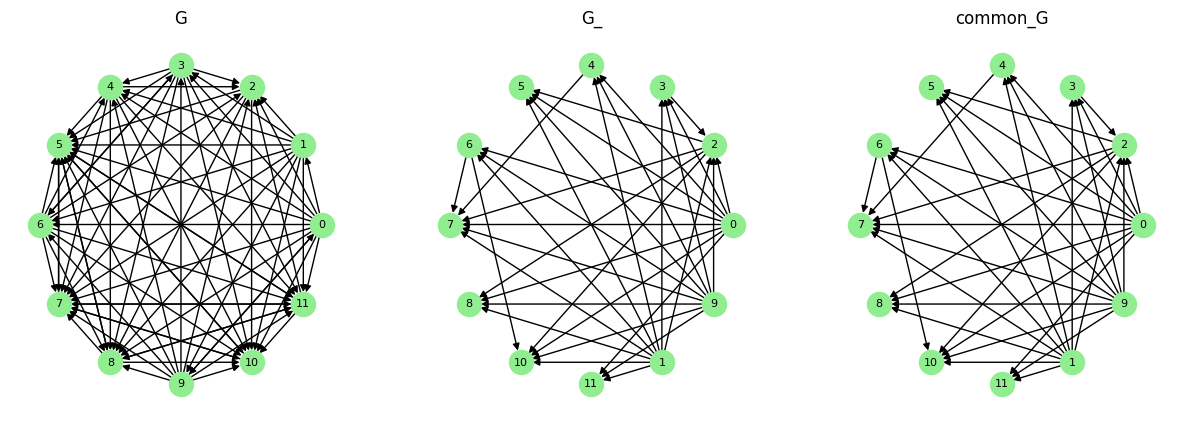

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [G, G_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

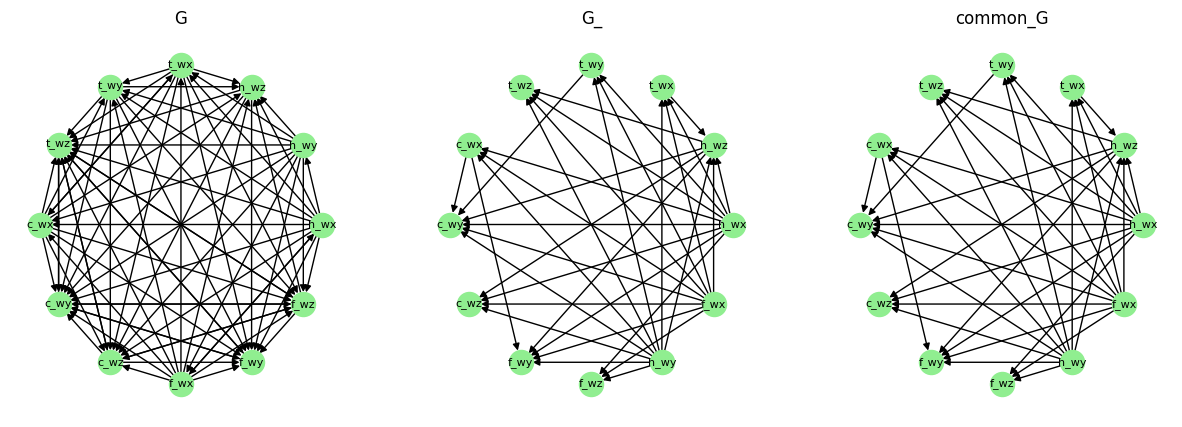

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Setup a Sample Graph (

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "h_wx",
    1: "h_wy",
    2: "h_wz",
    3: "t_wx",
    4: "t_wy",
    5: "t_wz",
    6: "c_wx",
    7: "c_wy",
    8: "c_wz",
    9: "f_wx",
    10: "f_wy",
    11: "f_wz"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

In [14]:
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[:,3:9] # hoop and tibia

# np.shape(data)[0] = 1894
# np.shape(data)[1] = 15

# computing network
G, G_, common_G, T_diff, C_diff = compute_functional_network(data,(0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] )

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

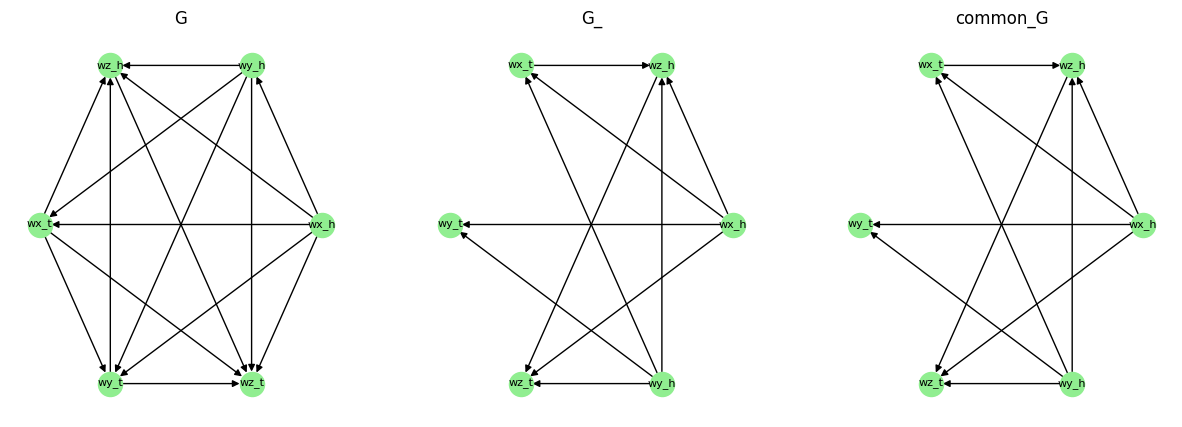

In [15]:

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "wx_h",
    1: "wy_h",
    2: "wz_h",
    3: "wx_t",
    4: "wy_t",
    5: "wz_t"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

In [16]:
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[:,[3,4,5,9,10,11]] # hoop and cuniform

# np.shape(data)[0] = 1894
# np.shape(data)[1] = 15

# computing network
G, G_, common_G, T_diff, C_diff = compute_functional_network(data,(0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] )

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

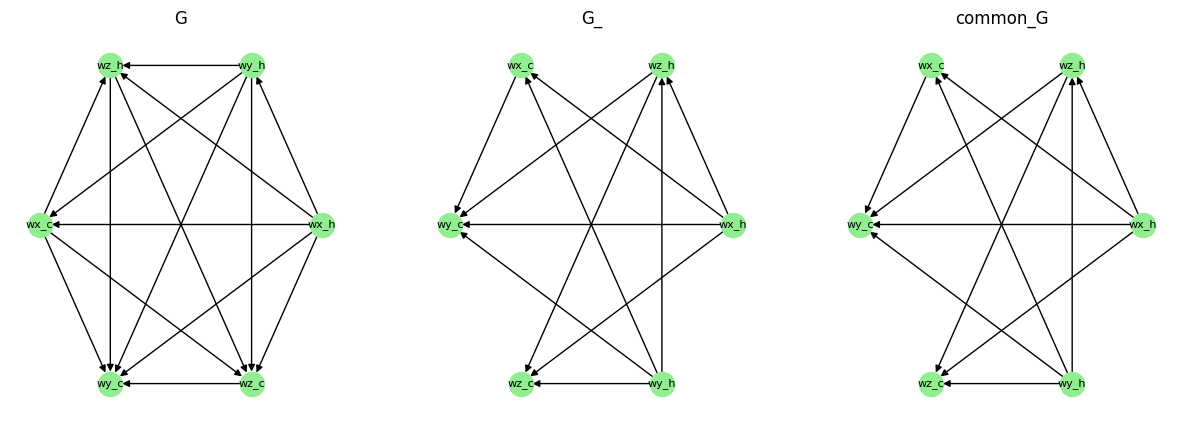

In [17]:

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "wx_h",
    1: "wy_h",
    2: "wz_h",
    3: "wx_c",
    4: "wy_c",
    5: "wz_c"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

In [18]:
data = np.load("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/data_experiment_5.npy")
np.shape(data)
data = data.T

data = data[:,[3,4,5,12,13,14]] # hoop and cuniform

# np.shape(data)[0] = 1894
# np.shape(data)[1] = 15

# computing network
G, G_, common_G, T_diff, C_diff = compute_functional_network(data,(0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data)[1] )

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum d

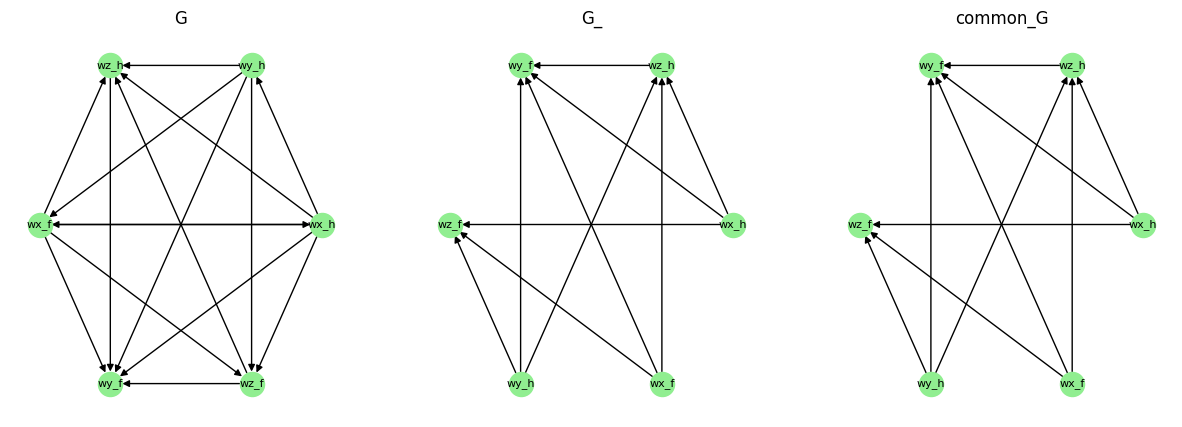

In [19]:

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "wx_h",
    1: "wy_h",
    2: "wz_h",
    3: "wx_f",
    4: "wy_f",
    5: "wz_f"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, graph, title in zip(axes, [LG, LG_, common_G], ["G", "G_", "common_G"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

# Debugging


In [13]:
C_threshold = 0.02
T_threshold = 0.02

n = 12
verbose = False

# create an array of edges according to information in C_xy and C_yx
edges_XonY = []
A_XonY = np.zeros((n,n))
edges_YonX = []
A_YonX = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            continue
        else:
            if C_diff[i, j] > C_threshold:
                edges_YonX.append([j, i])
                A_YonX[i,j] = 1
            elif C_diff[i, j] < -C_threshold:
                edges_XonY.append([i, j])
                A_XonY[i,j] = 1

            # # optional: add bi-directional coupling when C_xy = C_yx
            # else:
            #     edges.append([i, j])
            #     edges.append([j, i])

        # print for debugging
        if verbose:
            print(f'combi: {i} and {j}, C_diff = {C_diff[i, j]:.4f}, entry: {edges} ')

# generate graph
G_XonY = nx.DiGraph(edges_XonY)
G_YonX = nx.DiGraph(edges_YonX)

# create an array of edges according to information in T_xy and T_yx
edges_XonY_ = []
A_XonY_ = np.zeros((n,n))
edges_YonX_ = []
A_YonX_ = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            continue
        else:
            if T_diff[i, j] > T_threshold:
                edges_YonX_.append([j, i])
                A_YonX_[i,j] = 1
            elif T_diff[i, j] < -T_threshold:
                edges_XonY_.append([i, j])
                A_XonY_[i,j] = 1

            # # optional: add bi-directional coupling when C_xy = C_yx
            # else:
            #     edges_.append([i, j])
            #     edges_.append([j, i])

        # print for debugging
        if verbose:
            print(f'combi: {i} and {j}, Tdiff = {T_diff[i, j]:.4f}, entry: {edges_} ')

# generate graph
G_XonY_ = nx.DiGraph(edges_XonY_)
G_YonX_ = nx.DiGraph(edges_YonX_)

# generate graph from common edges, i.e. edges that are indicated by both T and C
edges = edges_XonY+edges_YonX
edges_ = edges_XonY_+edges_YonX_

G = nx.DiGraph(edges)
G_ = nx.DiGraph(edges_)

common_edges = common_elements(edges, edges_)
common_G = nx.DiGraph(common_edges)

common_edges_XonY = common_elements(edges_XonY, edges_XonY_)
common_G_XonY = nx.DiGraph(common_edges_XonY)

common_edges_YonX = common_elements(edges_YonX, edges_YonX_)
common_G_YonX = nx.DiGraph(common_edges_YonX)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Setup a Sample Graph (

# Define the mapping dictionary: {old_node_number: new_node_name}
mapping = {
    0: "h_wx",
    1: "h_wy",
    2: "h_wz",
    3: "t_wx",
    4: "t_wy",
    5: "t_wz",
    6: "c_wx",
    7: "c_wy",
    8: "c_wz",
    9: "f_wx",
    10: "f_wy",
    11: "f_wz"
}

# --- Relabel the Graphs ---
LG = nx.relabel_nodes(G, mapping)
LG_ = nx.relabel_nodes(G_, mapping)
common_G = nx.relabel_nodes(common_G, mapping)
# --- End Relabeling ---

# --- Plotting Code with New Names ---
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for ax, graph, title in zip(axes, [G_XonY, G_YonX, G_XonY_, G_YonX_], ["G_XonY", "G_YonX", "G_XonY_", "G_YonX_"]):
    pos = nx.circular_layout(graph)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()

In [94]:
print(edges_XonY_)
print(edges_XonY)
print(edges_YonX_)
print(edges_YonX)

[[0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 10], [0, 11], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 10], [1, 11], [2, 5], [2, 7], [2, 8], [2, 10], [3, 2], [4, 7], [6, 7], [6, 10], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 10], [9, 11]]
[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 10], [0, 11], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [2, 5], [2, 7], [2, 8], [2, 10], [3, 2], [3, 4], [3, 5], [3, 7], [3, 8], [3, 10], [3, 11], [4, 2], [4, 5], [4, 7], [4, 8], [4, 10], [4, 11], [6, 2], [6, 4], [6, 5], [6, 7], [6, 8], [6, 10], [6, 11], [8, 7], [8, 10], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 10], [9, 11], [11, 2], [11, 10]]
[[0, 2], [1, 2], [3, 2], [9, 2], [0, 3], [1, 3], [9, 3], [0, 4], [1, 4], [9, 4], [0, 5], [1, 5], [2, 5], [9, 5], [0, 6], [1, 6], [9, 6], [0, 7], [1, 7], [2, 7], [4, 7], [6, 7], [9, 7], [0, 8], [1, 8], [2, 8], [9, 8], [0, 10], [1, 10], [2

In [95]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", list(G.nodes())[:10])  # first 10 nodes
print("Edges:", list(G.edges())[:10])  # first 10 edges

# Optional: some network metrics
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())


Number of nodes: 12
Number of edges: 57
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11)]
Average degree: 9.5


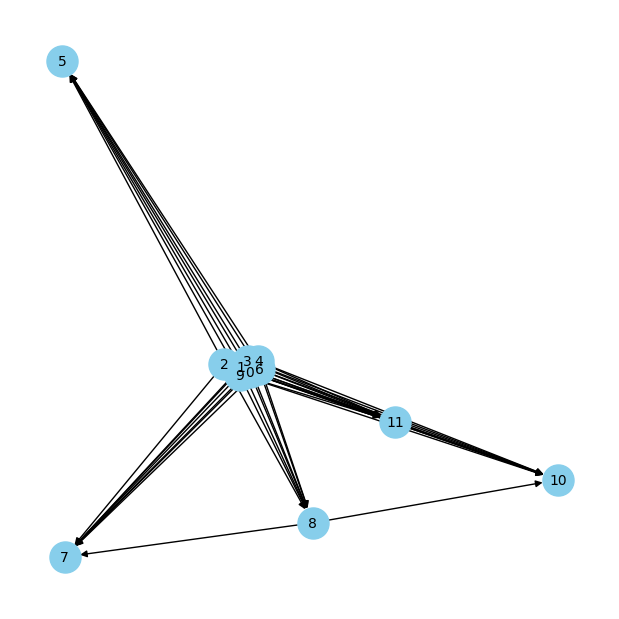

In [96]:
# visualize the file

# pick one graph to visualize
graph = G  

plt.figure(figsize=(6,6))
pos = nx.spring_layout(graph, seed=42)   # layout algorithm (force-directed)
nx.draw(
    graph, pos,
    with_labels=True,
    node_size=500,
    node_color="skyblue",
    font_size=10,
    font_color="black"
)
plt.show()

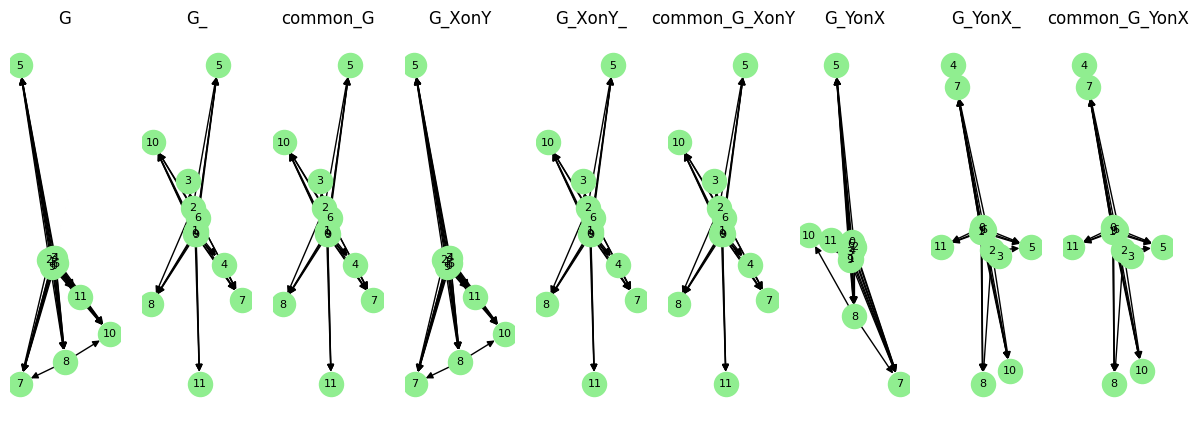

In [97]:
fig, axes = plt.subplots(1, 9, figsize=(15, 5))

for ax, graph, title in zip(axes, [G, G_, common_G, G_XonY, G_XonY_, common_G_XonY, G_YonX, G_YonX_, common_G_YonX], ["G", "G_", "common_G", "G_XonY", "G_XonY_", "common_G_XonY", "G_YonX", "G_YonX_", "common_G_YonX"]):
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=300,
        node_color="lightgreen",
        font_size=8,
        ax=ax
    )
    ax.set_title(title)

plt.show()


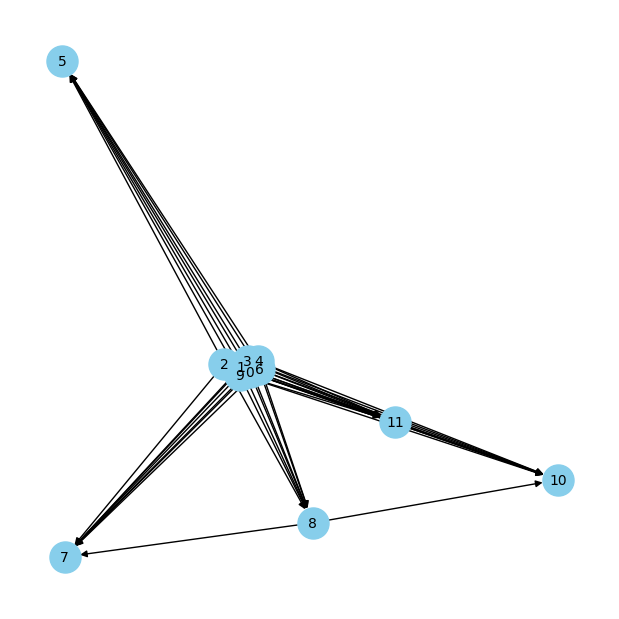

In [98]:
# visualize the file

# pick one graph to visualize
graph = G  

plt.figure(figsize=(6,6))
pos = nx.spring_layout(graph, seed=42)   # layout algorithm (force-directed)
nx.draw(
    graph, pos,
    with_labels=True,
    node_size=500,
    node_color="skyblue",
    font_size=10,
    font_color="black"
)
plt.show()

In [99]:
graph = G  
pos = nx.circular_layout(graph)

In [100]:
pos

{0: array([1.00000000e+00, 1.97028653e-08]),
 1: array([0.86602539, 0.50000001]),
 2: array([0.49999998, 0.86602545]),
 3: array([-2.36778241e-08,  1.00000000e+00]),
 4: array([-0.50000003,  0.86602539]),
 5: array([-0.86602535,  0.50000007]),
 6: array([-9.99999960e-01, -6.77199095e-08]),
 7: array([-0.86602541, -0.49999994]),
 8: array([-0.49999988, -0.86602541]),
 10: array([ 3.19584437e-08, -9.99999960e-01]),
 11: array([ 0.49999992, -0.86602541]),
 9: array([ 0.86602533, -0.50000015])}

In [101]:
# pos = nx.spectral_layout(graph)

In [102]:
pos

{0: array([1.00000000e+00, 1.97028653e-08]),
 1: array([0.86602539, 0.50000001]),
 2: array([0.49999998, 0.86602545]),
 3: array([-2.36778241e-08,  1.00000000e+00]),
 4: array([-0.50000003,  0.86602539]),
 5: array([-0.86602535,  0.50000007]),
 6: array([-9.99999960e-01, -6.77199095e-08]),
 7: array([-0.86602541, -0.49999994]),
 8: array([-0.49999988, -0.86602541]),
 10: array([ 3.19584437e-08, -9.99999960e-01]),
 11: array([ 0.49999992, -0.86602541]),
 9: array([ 0.86602533, -0.50000015])}

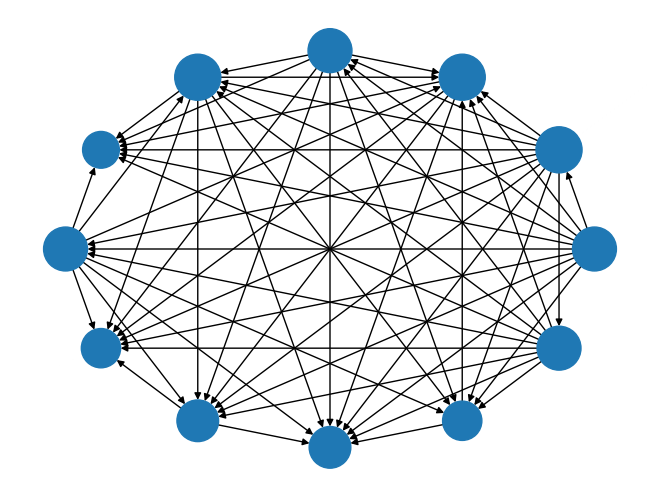

In [103]:
degrees = [graph.degree(n) * 100 for n in graph.nodes()] # Scale for size
nx.draw(graph, pos, node_size=degrees)

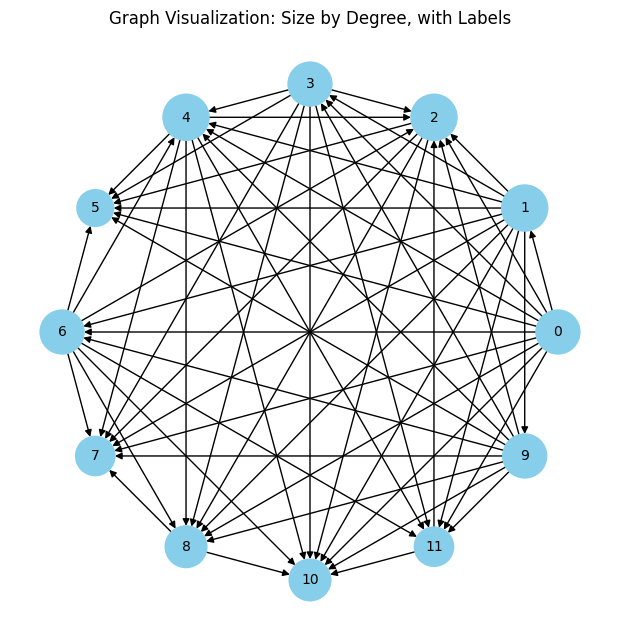

In [104]:


# Calculate node sizes based on degree, scaled by 100
degrees = [G.degree(n) * 100 for n in G.nodes()]

plt.figure(figsize=(6,6))

# Use nx.draw with the dynamic size and labels enabled
nx.draw(
    G, 
    pos,
    with_labels=True,        # <-- **This is the key to show node numbers**
    node_size=degrees,       # <-- Dynamic size based on degree
    node_color="skyblue",
    font_size=10,
    font_color="black"
)
plt.title("Graph Visualization: Size by Degree, with Labels")
plt.show()

In [ ]:
# Network method for each bone alone with hoop

